<a href="https://colab.research.google.com/github/charbells/1864093_ProcesamientoDeDatos/blob/main/1864093_Tarea6Codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install datasets

In [ ]:
pip install seaborn

In [6]:
import seaborn as sns
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
from sklearn.preprocessing import LabelEncoder
from datasets import load_dataset

In [3]:
# Cargar el dataset
ds = load_dataset("danavery/urbansound8K")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/5.66k [00:00<?, ?B/s]

(…)-00000-of-00016-e478d7cccca6a095.parquet:   0%|          | 0.00/434M [00:00<?, ?B/s]

(…)-00001-of-00016-299138aa39afaa06.parquet:   0%|          | 0.00/472M [00:00<?, ?B/s]

(…)-00002-of-00016-887e0748205b6fa9.parquet:   0%|          | 0.00/384M [00:00<?, ?B/s]

(…)-00003-of-00016-691ee48aa53d9c1f.parquet:   0%|          | 0.00/447M [00:00<?, ?B/s]

(…)-00004-of-00016-c0f37514d8e28a72.parquet:   0%|          | 0.00/441M [00:00<?, ?B/s]

(…)-00005-of-00016-55ef1a0a51149c01.parquet:   0%|          | 0.00/591M [00:00<?, ?B/s]

(…)-00006-of-00016-0ef363072505e6d5.parquet:   0%|          | 0.00/496M [00:00<?, ?B/s]

(…)-00007-of-00016-dfac173beb21e5db.parquet:   0%|          | 0.00/588M [00:00<?, ?B/s]

(…)-00008-of-00016-2744487f32f65d77.parquet:   0%|          | 0.00/493M [00:00<?, ?B/s]

(…)-00009-of-00016-83fc7364d4798177.parquet:   0%|          | 0.00/549M [00:00<?, ?B/s]

(…)-00010-of-00016-4c1d0e285ed77843.parquet:   0%|          | 0.00/353M [00:00<?, ?B/s]

(…)-00011-of-00016-79d186503a26671b.parquet:   0%|          | 0.00/316M [00:00<?, ?B/s]

(…)-00012-of-00016-6aff88fdcca22918.parquet:   0%|          | 0.00/372M [00:00<?, ?B/s]

(…)-00013-of-00016-17d827b1a5be0423.parquet:   0%|          | 0.00/348M [00:00<?, ?B/s]

(…)-00014-of-00016-c630762df85f6cf4.parquet:   0%|          | 0.00/381M [00:00<?, ?B/s]

(…)-00015-of-00016-03506887d89adfc9.parquet:   0%|          | 0.00/335M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8732 [00:00<?, ? examples/s]

In [ ]:
# Verificar la estructura de un elemento de muestra
print("Ejemplo de estructura de datos:")
print(ds['train'][0])

Ejemplo de estructura de datos:
{'audio': {'path': '100032-3-0-0.wav', 'array': array([-0.00454712, -0.00483704, -0.00460815, ..., -0.00065613,
       -0.00048828,  0.        ]), 'sampling_rate': 44100}, 'slice_file_name': '100032-3-0-0.wav', 'fsID': 100032, 'start': 0.0, 'end': 0.317551, 'salience': 1, 'fold': 5, 'classID': 3, 'class': 'dog_bark'}


Duración: 0.32 segundos
Frecuencia de muestreo: 44100 Hz
Etiqueta: dog_bark


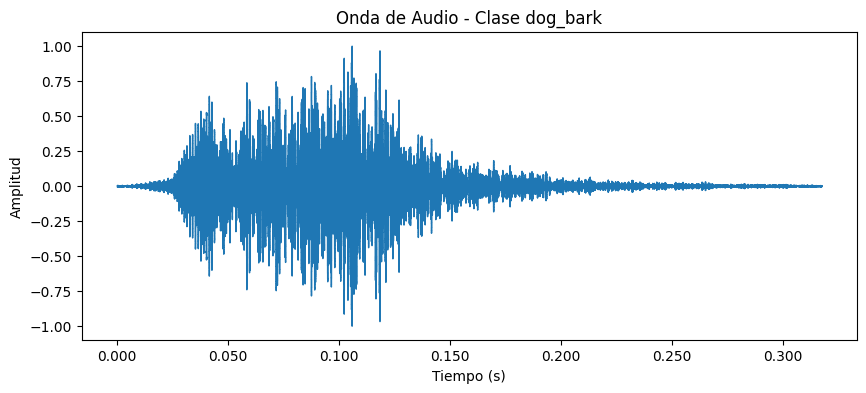

In [ ]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Obtener el primer audio del dataset
audio_data = ds['train'][0]['audio']  # Diccionario con 'array' y 'sampling_rate'
audio = np.array(audio_data['array'])  # Extraer la señal de audio como NumPy array
sr = audio_data['sampling_rate']  # Obtener la frecuencia de muestreo
label = ds['train'][0]['class']  # Obtener la etiqueta de la clase

# Mostrar información
print(f"Duración: {len(audio) / sr:.2f} segundos")
print(f"Frecuencia de muestreo: {sr} Hz")
print(f"Etiqueta: {label}")

# Graficar la forma de onda
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title(f"Onda de Audio - Clase {label}")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()


🔊 Audio muestra: Air Conditioner



🔊 Audio muestra: Car Horn



🔊 Audio muestra: Children Playing



🔊 Audio muestra: Dog Bark



🔊 Audio muestra: Street Music


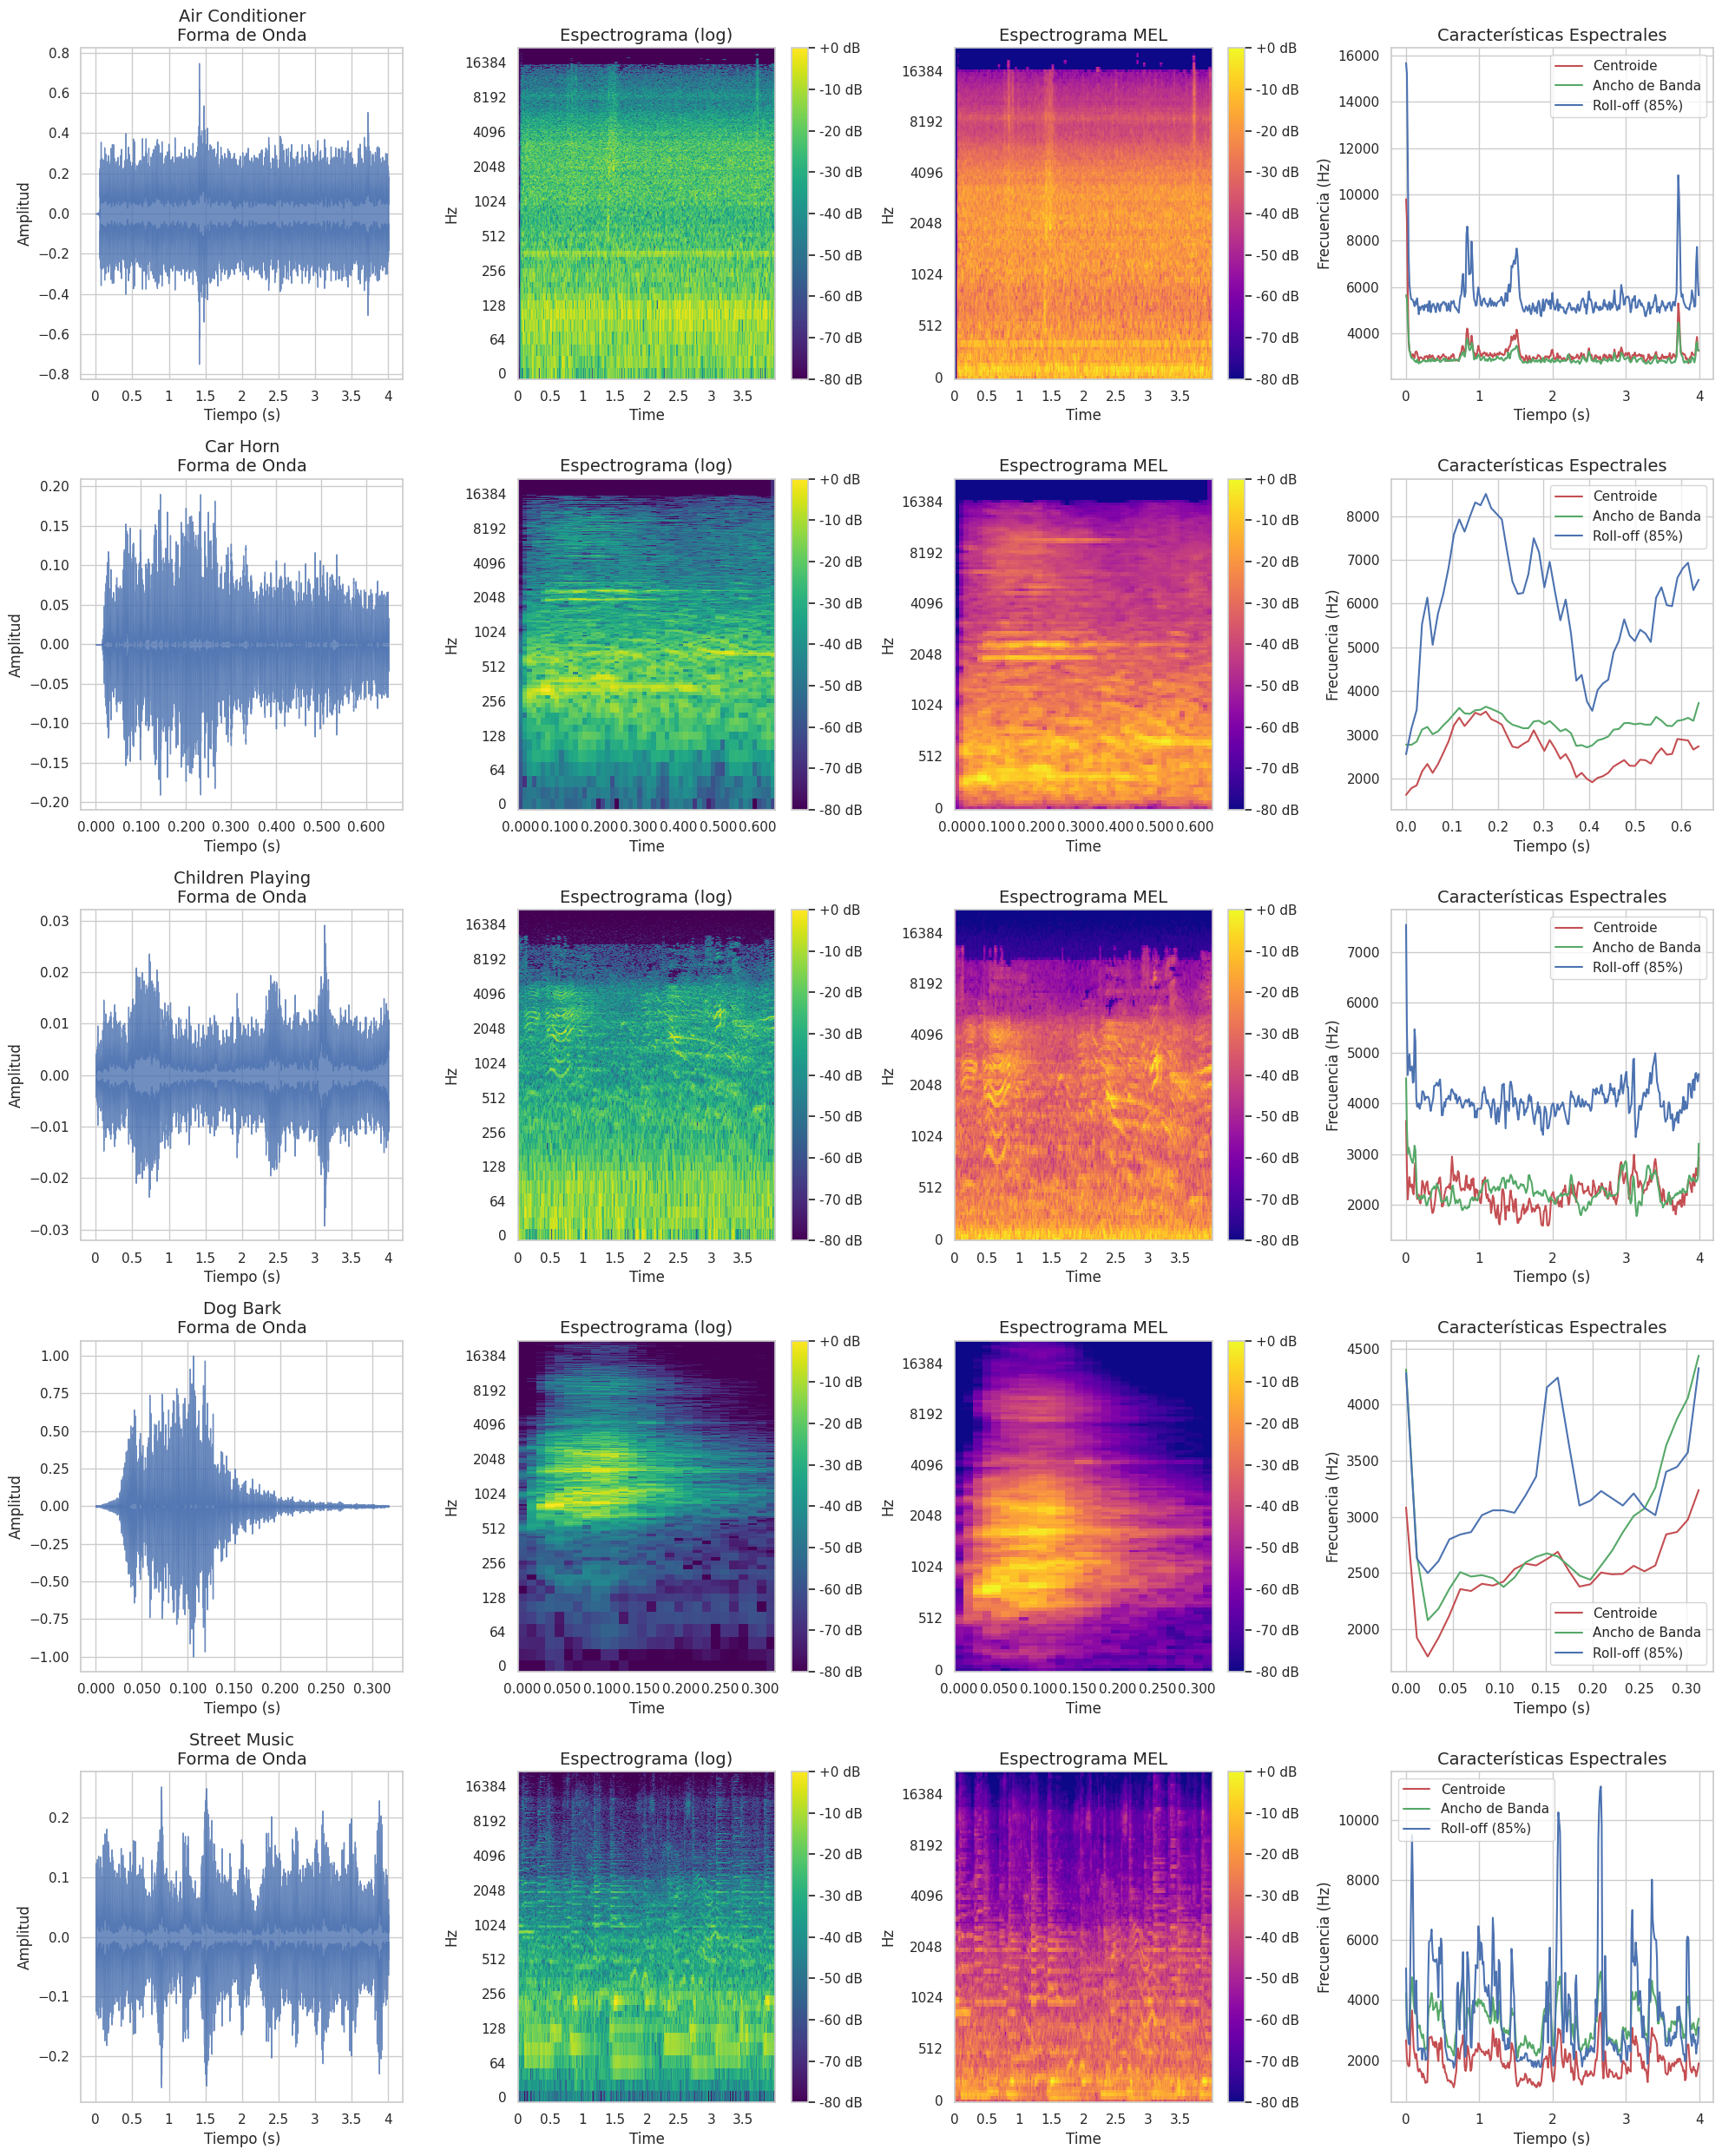


📊 Tabla Comparativa de Características:


,Clase,Duración (s),Centroide (Hz),Ancho Banda (Hz),Roll-off (Hz),Amplitud Máx,Amplitud Media
0,Air Conditioner,4.00,3124,2931,5514,0.75,0.08
1,Car Horn,0.65,2617,3222,6022,0.19,0.03
2,Children Playing,4.00,2232,2284,4081,0.03,0.00
3,Dog Bark,0.32,2501,2850,3253,1.00,0.09
4,Street Music,4.00,1939,3242,3601,0.25,0.04


In [9]:
# Configuración de estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

# Función mejorada para análisis de una muestra por clase
def analyze_single_sample_per_class(classes, ds):
    fig, axs = plt.subplots(len(classes), 4, figsize=(20, 5*len(classes)))

    stats_data = []

    for idx, class_name in enumerate(classes):
        # Obtener el primer audio de la clase
        sample = next(item for item in ds['train'] if item['class'] == class_name)
        audio_data = sample['audio']
        audio = np.array(audio_data['array'])
        sr = audio_data['sampling_rate']

        # Calcular características
        stft = np.abs(librosa.stft(audio))
        spectrogram = librosa.amplitude_to_db(stft, ref=np.max)
        mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
        mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
        spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)[0]
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)[0]
        spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)[0]

        # Visualización 1: Forma de onda
        librosa.display.waveshow(audio, sr=sr, ax=axs[idx, 0], alpha=0.8, color='b')
        axs[idx, 0].set_title(f'{class_name.replace("_", " ").title()}\nForma de Onda')
        axs[idx, 0].set_xlabel('Tiempo (s)')
        axs[idx, 0].set_ylabel('Amplitud')

        # Visualización 2: Espectrograma
        img = librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log',
                                     ax=axs[idx, 1], cmap='viridis')
        axs[idx, 1].set_title('Espectrograma (log)')
        fig.colorbar(img, ax=axs[idx, 1], format='%+2.0f dB')

        # Visualización 3: Espectrograma MEL
        img = librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time',
                                      y_axis='mel', ax=axs[idx, 2], cmap='plasma')
        axs[idx, 2].set_title('Espectrograma MEL')
        fig.colorbar(img, ax=axs[idx, 2], format='%+2.0f dB')

        # Visualización 4: Características espectrales
        times = librosa.times_like(spectral_centroid, sr=sr)
        axs[idx, 3].plot(times, spectral_centroid, label='Centroide', color='r')
        axs[idx, 3].plot(times, spectral_bandwidth, label='Ancho de Banda', color='g')
        axs[idx, 3].plot(times, spectral_rolloff, label='Roll-off (85%)', color='b')
        axs[idx, 3].legend()
        axs[idx, 3].set_title('Características Espectrales')
        axs[idx, 3].set_xlabel('Tiempo (s)')
        axs[idx, 3].set_ylabel('Frecuencia (Hz)')

        # Almacenar estadísticas
        stats_data.append({
            'Clase': class_name.replace('_', ' ').title(),
            'Duración (s)': round(len(audio)/sr, 2),
            'Centroide (Hz)': int(np.mean(spectral_centroid)),
            'Ancho Banda (Hz)': int(np.mean(spectral_bandwidth)),
            'Roll-off (Hz)': int(np.mean(spectral_rolloff)),
            'Amplitud Máx': round(np.max(np.abs(audio)), 4),
            'Amplitud Media': round(np.mean(np.abs(audio)), 4)
        })

        # Reproducir audio
        print(f"\n🔊 Audio muestra: {class_name.replace('_', ' ').title()}")
        display(Audio(audio, rate=sr))

    plt.tight_layout()
    plt.show()

    # Mostrar tabla comparativa
    print("\n📊 Tabla Comparativa de Características:")
    import pandas as pd
    stats_df = pd.DataFrame(stats_data)

    # Apply background gradient
    styled_df = stats_df.style.background_gradient(cmap='Blues')

    # Format with desired precision - apply to numeric columns
    numeric_cols = stats_df.select_dtypes(include=np.number).columns
    styled_df = styled_df.format(precision=2, subset=numeric_cols)

    display(styled_df)

# Ejecutar análisis para las 5 clases seleccionadas
selected_classes = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'street_music']
analyze_single_sample_per_class(selected_classes, ds)